<p style="text-align:center;">
<span style="font-size:30px;">
<span style="color:purple;">
<b>Titanic Data Analysis 
    </b>
    </span>
    </span>
    </p>

   .   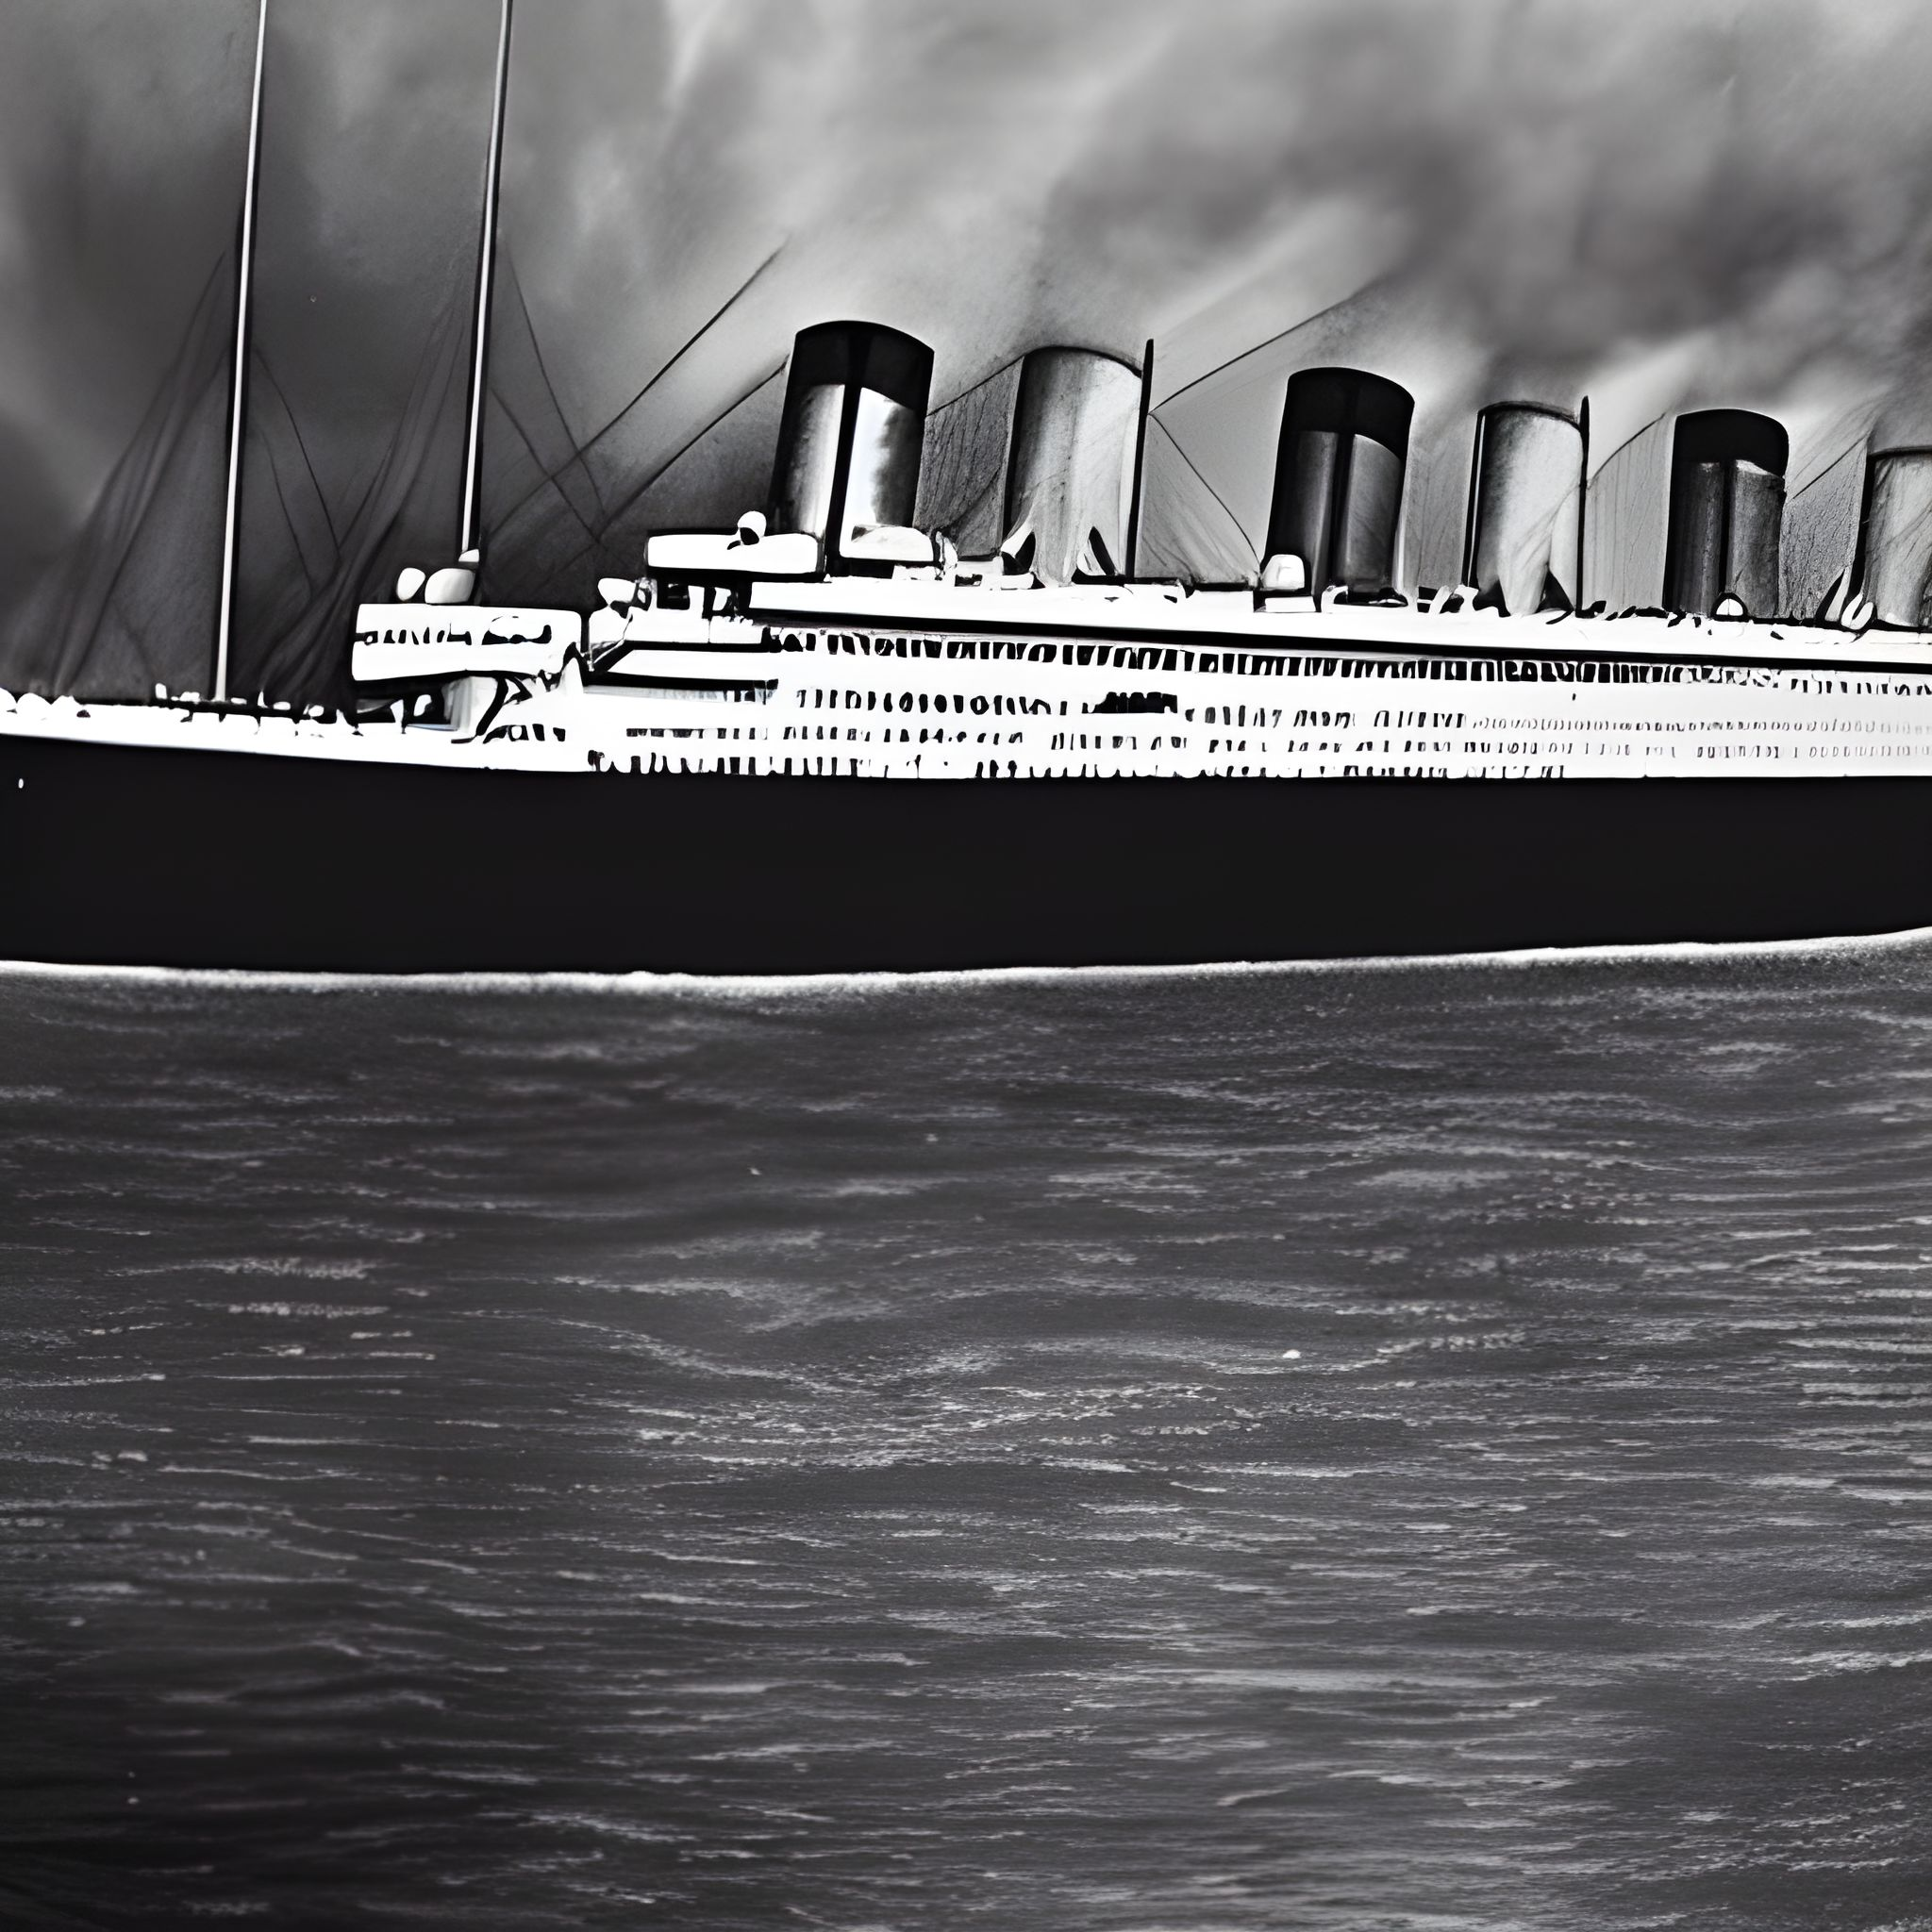

<span style="color:purple;">
<span style="font-size:20px;">
On April 10, 1912, the Titanic set sail from Southampton, England on its maiden voyage across the Atlantic Ocean. The ship was carrying 2,224 passengers and crew members and was touted as being “unsinkable” due to its 16 watertight compartments. However, on April 14, the Titanic struck an iceberg and began to sink. Over 1,500 people lost their lives in the disaster, making it one of the deadliest maritime accidents in history.In this analysis, we will explore the dataset of the Titanic – from its passengers to its survivors.
    </span>
    </span>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#BF40BF;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center;">
<span style="font-size:20px;"> Obtaining the Data
    </span>
    </p>
    </div>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplt
import plotly.express as px
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
%matplotlib inline

In [48]:
titanic = pd.read_csv("Titanic.csv")

<p style="text-align:center;">
<span style="color:purple;">
<span style="font-size:20px;">Discription 
    </span>
    </span>
    </p>

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#BF40BF;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center;">
<span style="font-size:20px;"> Scrubbing the Data
    </span>
    </p>
    </div>

In [5]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

<span style="color:purple;">
<span style="font-size:15px;">
The result above shows that there are missing values in Age, Cabin and in Embarked.
we'll have to note this so we can make the appropriate correction before building our model.
    </span>
    </span>

In [6]:
pd.reset_option('display.max_row')
pd.reset_option('display.max_columns')
titanic.head(20).style.background_gradient(cmap='Purples_r')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458300,nan,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,nan,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,nan,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,nan,C


In [7]:
titanic = titanic.rename(columns={'PassengerId' : 'Passenger_ID',
                         'Survived' : 'Survived', 
                         'Pclass' : 'Pclass', 
                         'Name' : 'Names',
                         'Sex' : 'Gender',
                         'Age' : 'Age',
                         'SibSp' : 'SibSp',
                         'Parch' : 'Parch',
                         'Ticket' : 'Ticket',
                         'Fare' : 'Fare',
                         'Cabin' : 'Cabin',
                         'Embarked' : 'Embarked'
                         })

In [8]:
titanic.head(10).style.background_gradient(cmap='Purples_r')

,Passenger_ID,Survived,Pclass,Names,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458300,nan,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,nan,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,nan,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,nan,C


In [9]:
front = titanic['Names']
titanic.drop(labels=['Names'], axis=1,inplace = True)
titanic.insert(0, 'Names', front)
titanic.head().style.background_gradient(cmap='Purples_r')

,Names,Passenger_ID,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",1,0,3,male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.000000,1,0,PC 17599,71.283300,C85,C
2,"Heikkinen, Miss. Laina",3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.000000,1,0,113803,53.100000,C123,S
4,"Allen, Mr. William Henry",5,0,3,male,35.000000,0,0,373450,8.050000,nan,S


In [10]:
front = titanic['Passenger_ID']
titanic.drop(labels=['Passenger_ID'], axis=1,inplace = True)
titanic.insert(0, 'Passenger_ID', front)
titanic.head().style.background_gradient(cmap='Purples_r')

,Passenger_ID,Names,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,"Braund, Mr. Owen Harris",0,3,male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,"Heikkinen, Miss. Laina",1,3,female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35.000000,1,0,113803,53.100000,C123,S
4,5,"Allen, Mr. William Henry",0,3,male,35.000000,0,0,373450,8.050000,nan,S


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#BF40BF;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center;">
<span style="font-size:20px;"> Exploring the Data
    </span>
    </p>
    </div>

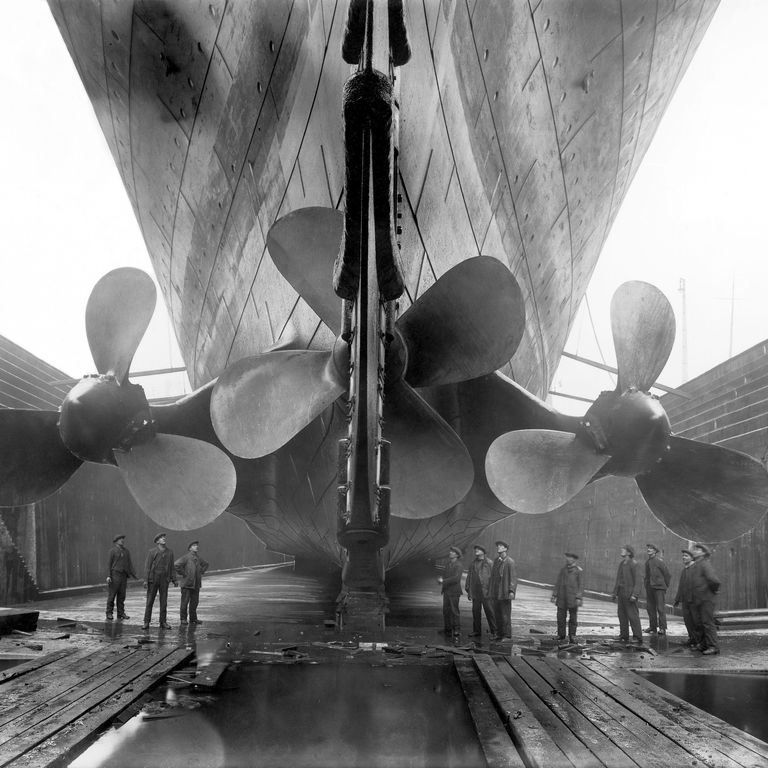

<span style="color:Purple;">
<span style="font-size:25px;">
<b> Statistical Overview
    </b>
</span>
</span>

In [11]:
# the dataset contain 12 columns and 891 observasion
titanic.shape

(891, 12)

In [12]:
titanic.dtypes

Passenger_ID      int64
Names            object
Survived          int64
Pclass            int64
Gender           object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

In [13]:
Survived_rate = titanic.Survived.value_counts() / len(titanic)
Survived_rate

0    0.616162
1    0.383838
Name: Survived, dtype: float64

The survivor's are about 38% of the passenger's from the data set

In [14]:
titanic.describe().style.background_gradient(cmap = "Purples")

,Passenger_ID,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The above is the Statistical overview of the Dataset(Titanic),
the total count of each column **Note** That the column Age as some missing values we'll get back to that.
the mean, the standard deviation, the minimum, the maximum and the quartiles   

In [15]:
## Overview of summary (Survivor V.S. Non-Survivor)
Survived_summary = titanic.groupby('Survived')
Survived_summary.mean()

,Passenger_ID,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


.

<span style="color:Purple;">
<span style="font-size:25px;">
<b>Correlation Matrix & Heatmap
    </b>
</span>
</span>

,Passenger_ID,Survived,Pclass,Age,SibSp,Parch,Fare
Passenger_ID,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


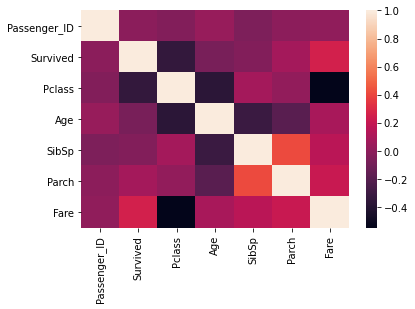

In [16]:
corr = titanic.corr()
corr = (corr)
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values)

corr

**Moderate Negatively Correlated Feature:**
* Survived vs pclass: -0.338481
* Age vs Pclass: -0.369226
* SibSp vs Age: -0.308247	
* Pclass vs Fare: -0.549500

**Moderate Positively Correlated Features:**
* Parch vs SibSp: 0.414838
* Survive vs Fare: 0.257307

From the heatmap, there is a positive(+) correlation between Parch and SlibSp
For the negative(-) relationships, Pclass and Fare are highly correlated

.

<span style="color:Purple;">
<span style="font-size:20px;">
<b>Statistical Test for Correlation
    </b>
</span>
</span>

**One-Sample T-Test** 

A one-sample t-test checks whether a sample mean differs from the population mean. Since Passenger Class has the highest correlation with our dependent variable Survived, let's test to see whether the average Passenger class level of People that had Survived differs from the those that had not Survived.

**Hypothesis Testing:** Is there significant difference in the means of Passanger class who had Survived and Passanger Class who had not Survived?

*  **Null Hypothesis:** (H0: PCS = PCS) The null hypothesis would be that there is no difference in Passanger Class of people who did Survived and those who did not..

*  **Alternate Hypothesis:** (HA: PCS!= PCS) The alternative hypothesis would be that there is a difference in Passanger Class of people who did Survived and those who did not..

In [17]:
Ps_population = titanic['Pclass'][titanic['Survived'] == 0].mean()
Ps_Survived_Pclass = titanic[titanic['Survived']==1]['Pclass'].mean()

print( 'The mean Passanger class for the population that did not Survived: ' + str(Ps_population))
print( 'The mean Passanger class for the population that did Survived: ' + str(Ps_Survived_Pclass))

The mean Passanger class for the population that did not Survived: 2.5318761384335153
The mean Passanger class for the population that did Survived: 1.9502923976608186


<span style="color:Purple;">
<span style="font-size:20px;">
<b>Conducting the T-Test
    </b>
    </span>
    </span>

Let's conduct a t-test at **95% confidence level** and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the passanger population. To conduct a one sample t-test, we can use the stats.ttest_1samp() function:



In [18]:
import scipy.stats as stats
stats.ttest_1samp(a= titanic[titanic['Survived']==1]['Pclass'],
                 popmean = Ps_population)

Ttest_1sampResult(statistic=-12.458139656460963, pvalue=1.2860105644736727e-29)

.

<span style="color:Purple;">
<span style="font-size:20px;">
<b>T-Test Quantile
    </b>
    </span>
    </span>

In [19]:
degree_freedom = len(titanic[titanic['Survived']==1])

LQ = stats.t.ppf(0.025,degree_freedom)
RQ = stats.t.ppf(0.975,degree_freedom)

print('The t-distribution left quartile range is: ' + str(LQ))
print('The t-distribution right quartile range is: ' + str(RQ))


The t-distribution left quartile range is: -1.9669246454802793
The t-distribution right quartile range is: 1.966924645480279


In [20]:
degree_freedom = len(titanic[titanic['Pclass']==1])

LQ = stats.t.ppf(0.025,degree_freedom)
RQ = stats.t.ppf(0.975,degree_freedom)

print('The t-distribution left quartile range is: ' + str(LQ))
print('The t-distribution right quartile range is: ' + str(RQ))


The t-distribution left quartile range is: -1.9710074720029072
The t-distribution right quartile range is: 1.9710074720029067


**One-Sample T-Test Summary**

**T-test=-12.4581| P-Value=1.28601_|Reject Null Hypothesis**

Reject the null hypothesis because:
* T-Test score is outside the quantiles

.


<span style="color:Purple;">
<span style="font-size:20px;">
<b>Distribution Plots
    </b>
    </span>
    </span>

Text(0, 0.5, 'population count')

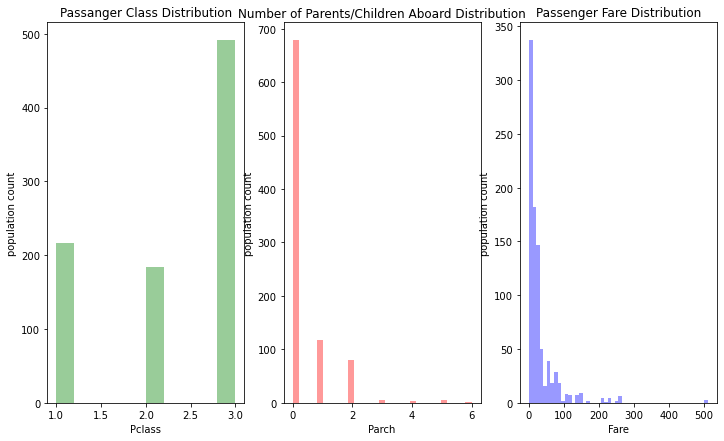

In [22]:
f, axes = plt.subplots(ncols=3, figsize=(12, 7))

sns.distplot(titanic.Pclass, kde=False, color="g", 
            ax=axes[0]).set_title('Passanger Class Distribution')
axes[0].set_ylabel('population count')

sns.distplot(titanic.Parch, kde=False, color="r", 
            ax=axes[1]).set_title('Number of Parents/Children Aboard Distribution')
axes[1].set_ylabel('population count')

sns.distplot(titanic.Fare, kde=False, color="b", 
            ax=axes[2]).set_title('Passenger Fare Distribution')
axes[2].set_ylabel('population count')


.


<p style="text-align:center;">
<span style="color:Purple;">
<span style="font-size:17px;">
<b>Passanger Class vs Survived
    </b>
    </span>
    </span>
    </p>

In [195]:
titanic[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


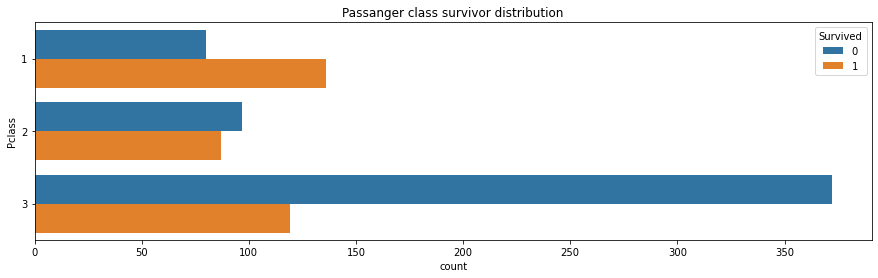

In [24]:
fx, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="Pclass", hue='Survived', data=titanic).set_title('Passanger class survivor distribution');

3    491
1    216
2    184
Name: Pclass, dtype: int64


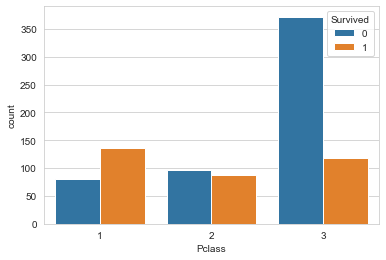

In [77]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='Survived',data=titanic)

print(titanic['Pclass'].value_counts())

**Passanger Class vs Survived**
this is not unusual
majority of the population that survived are from the 1st class
followed by the 3rd class i guess that the 2nd class where very unlucky


.

<p style="text-align:center;">
<span style="color:Purple;">
<span style="font-size:17px;">
<b>Age vs Survived
    </b>
    </span>
    </span>
    </p>

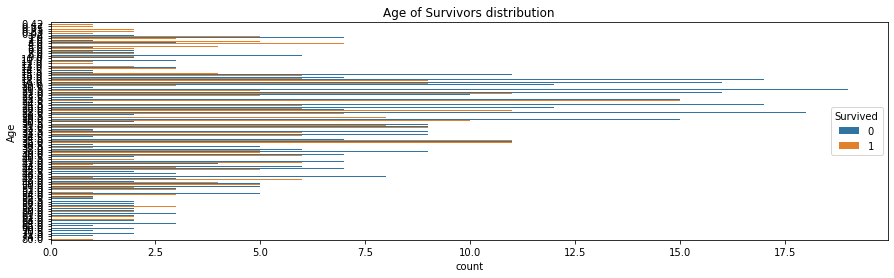

In [25]:
fx, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y='Age',hue='Survived', data=titanic).set_title('Age of Survivors distribution');

In [26]:
fig = px.box(titanic, x = "Survived", y = "Age", color = "Survived",
                  color_discrete_sequence = ["#BF40BF"],
                  title = "Age vs Survived")
fig.show()


Text(0.5, 0, 'Age (years)')

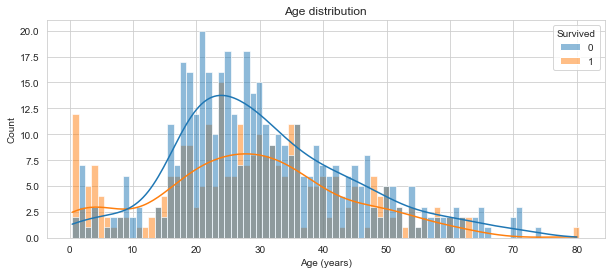

In [79]:
# Figure size
plt.figure(figsize=(10,4))
sns.histplot(data=titanic, x='Age', hue='Survived', binwidth=1, kde=True)
plt.title('Age distribution')
plt.xlabel('Age (years)')

<p style="text-align:center;">
<span style="color:Purple;">
<span style="font-size:17px;">
<b>Number of Parents/Children Aboard vs Survived
    </b>
    </span>
    </span>
    </p>

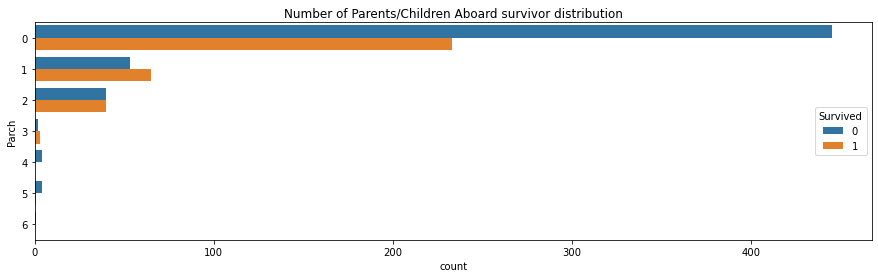

In [57]:
fx, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="Parch", hue='Survived', data=titanic).set_title('Number of Parents/Children Aboard survivor distribution');

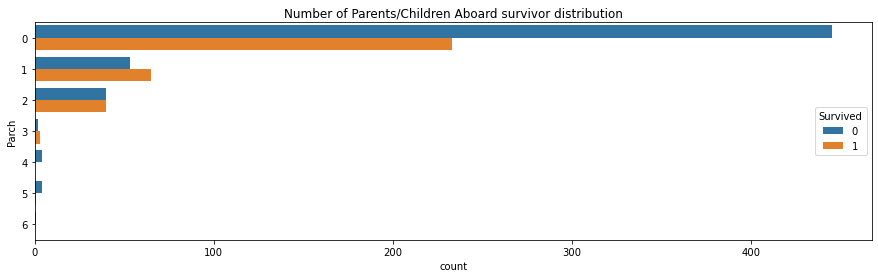

In [59]:
fx, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="Parch", hue='Survived', data=titanic).set_title('Number of Parents/Children Aboard survivor distribution');

In [61]:
fig = px.box(titanic, x = "Survived", y = "Parch",
                  color_discrete_sequence = ["#CC8899"],
                  title = "Number of Parents/Children Aboard survivor distribution")
fig.show()


In [62]:
fig=px.box(titanic, y='Parch')
fig.show()

**Number of Parents/Children Aboard vs Survived**
Close to half of passangerd without parent of children survived but based on the data there where not many passanger with parent.


.

<p style="text-align:center;">
<span style="color:Purple;">
<span style="font-size:17px;">
<b>Passanger Class vs Passanger Fare
    </b>
    </span>
    </span>
    </p>

Text(0.5, 1.0, 'Passanger class and Fare Distribution')

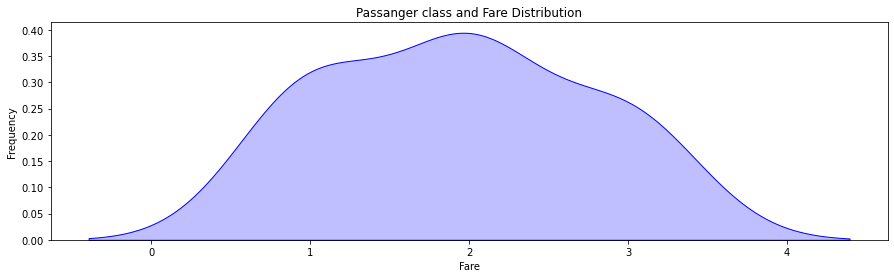

In [29]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(titanic.loc[(titanic['Fare'] == 0),'Pclass'] , color='b',shade=True,)
ax=sns.kdeplot(titanic.loc[(titanic['Fare'] == 1),'Pclass'] , color='r',shade=True, )
ax.set(xlabel='Fare', ylabel='Frequency')
plt.title('Passanger class and Fare Distribution')

In [31]:
fig = px.box(titanic, x = "Pclass", y = "Fare",
                  color_discrete_sequence = ["#CC8899"],
                  title = "Passanger class and Fare Distribution")
fig.show()


<p style="text-align:center;">
<span style="color:Purple;">
<span style="font-size:17px;">
<b>Passanger Class vs  Port of Embarkation
    </b>
    </span>
    </span>
    </p>

In [32]:
fig = px.line(titanic, x = "Embarked", y = "Pclass",
                  color_discrete_sequence = ["#CC8899"],
                  title = "Passanger class Port of Embarktion Distribution")
fig.show()

In [33]:
fig = px.scatter(titanic, x = "Embarked", y = "Pclass",
                  color_discrete_sequence = ["#CC8899"],
                  title = "Passanger class Port of Embarktion Distribution")
fig.show()

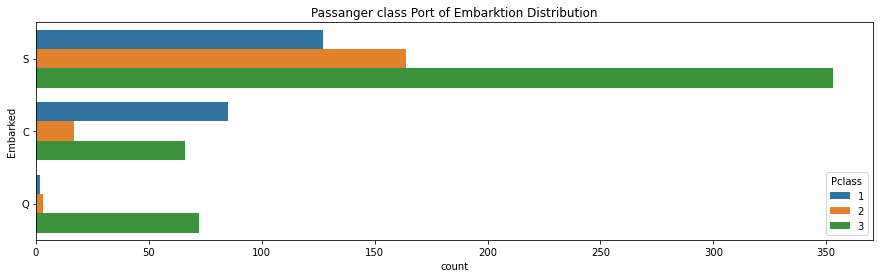

In [34]:
fx, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="Embarked", hue='Pclass', data=titanic).set_title('Passanger class Port of Embarktion Distribution');

<AxesSubplot:xlabel='Survived', ylabel='count'>

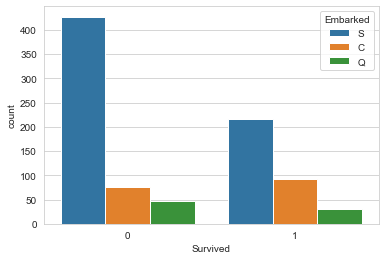

In [82]:
titanic['Embarked'].value_counts()

sns.countplot(x='Survived',hue='Embarked',data=titanic)

.

<p style="text-align:center;">
<span style="color:Purple;">
<span style="font-size:17px;">
<b>Gender vs Survived
    </b>
    </span>
    </span>
    </p>

In [194]:
titanic[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending = False)

,Survived
Sex,
0,0.742038
1,0.188908


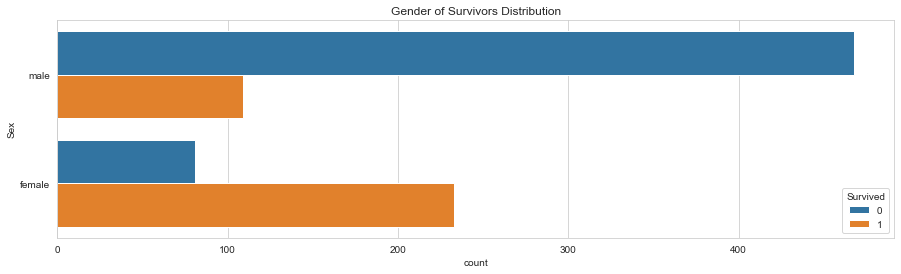

In [85]:
fx, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="Sex", hue='Survived', data=titanic).set_title('Gender of Survivors Distribution');

In [70]:
fig=px.histogram (titanic, y ='Sex')
fig.show()

male      577
female    314
Name: Sex, dtype: int64


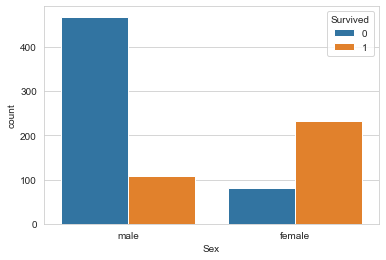

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',hue='Survived',data=titanic)

print(titanic['Sex'].value_counts())

From the dataset there were more women who survived compred to men
majority of the women survived.

Text(0.5, 1.0, 'Females')

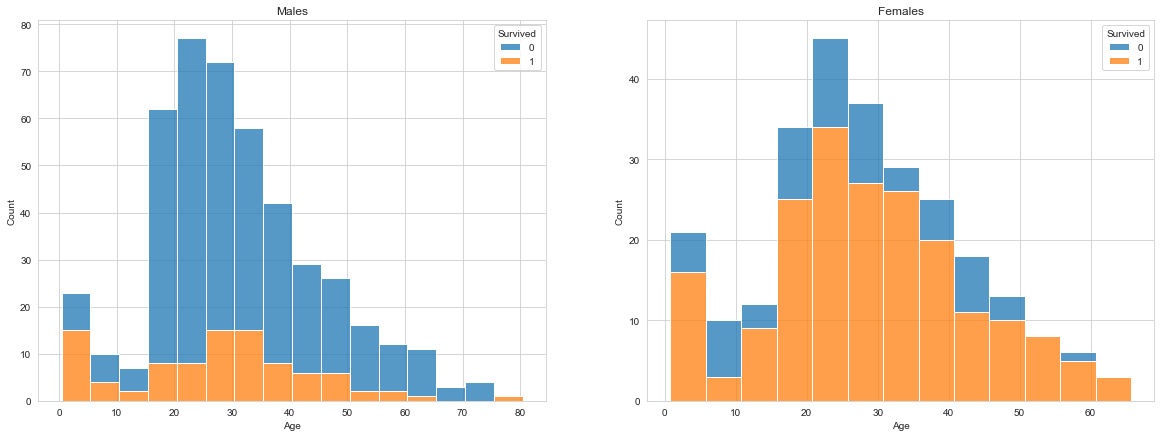

In [80]:
sns.plot , ax = plt.subplots(1 , 2 , figsize=(20,7))
sns.histplot(data = titanic.loc[titanic["Sex"]=="male"] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[0],multiple = "stack").set_title("Males")

sns.histplot(data = titanic.loc[titanic["Sex"]=="female"] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[1],multiple = "stack").set_title("Females")

<p style="text-align:center;">
<span style="color:Purple;">
<span style="font-size:17px;">
<b>Siblings and spouse on board distribution
    </b>
    </span>
    </span>
    </p>

In [193]:
titanic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='count'>

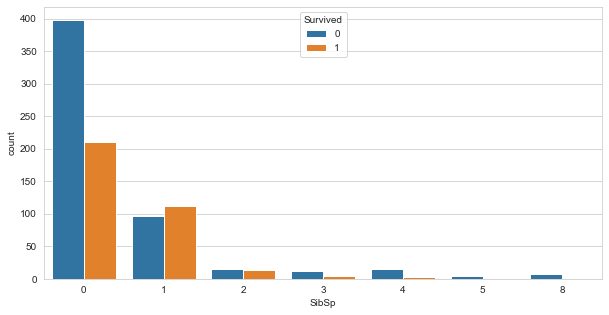

In [78]:
 plt.figure(figsize=(10, 5))

sns.set_style('whitegrid')
sns.countplot(x='SibSp',hue='Survived',data=titanic)

.


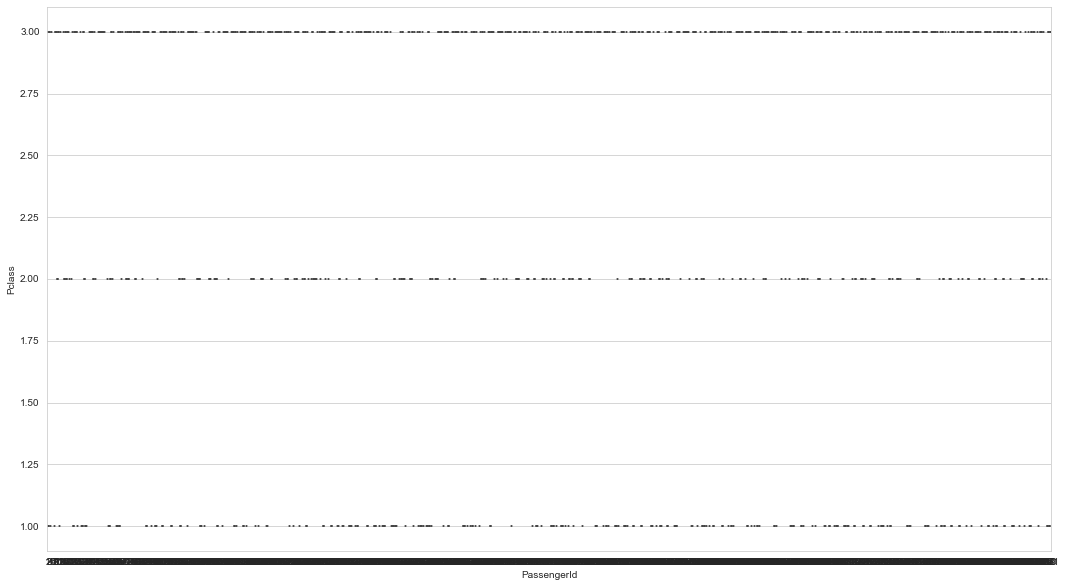

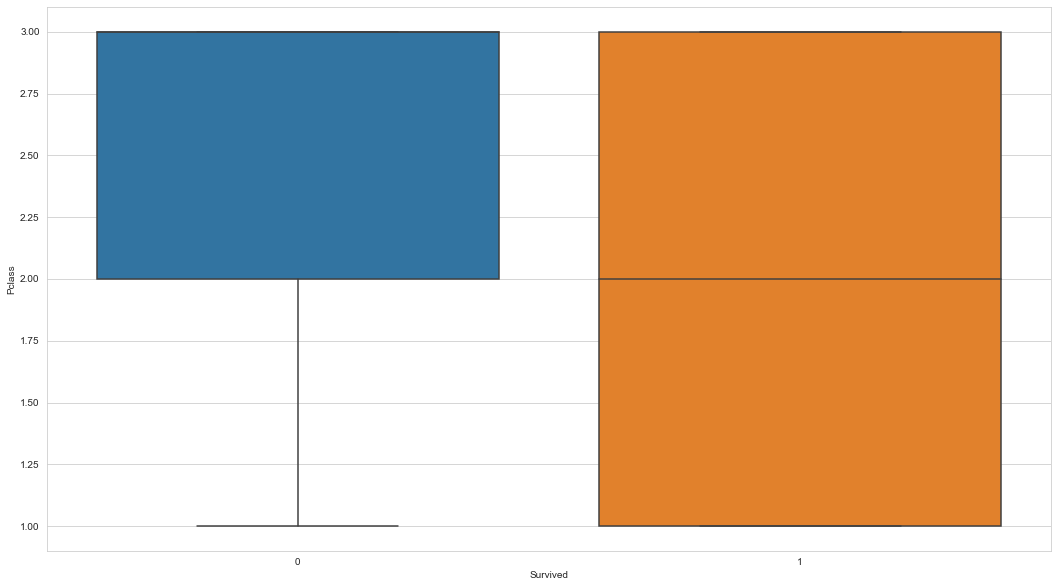

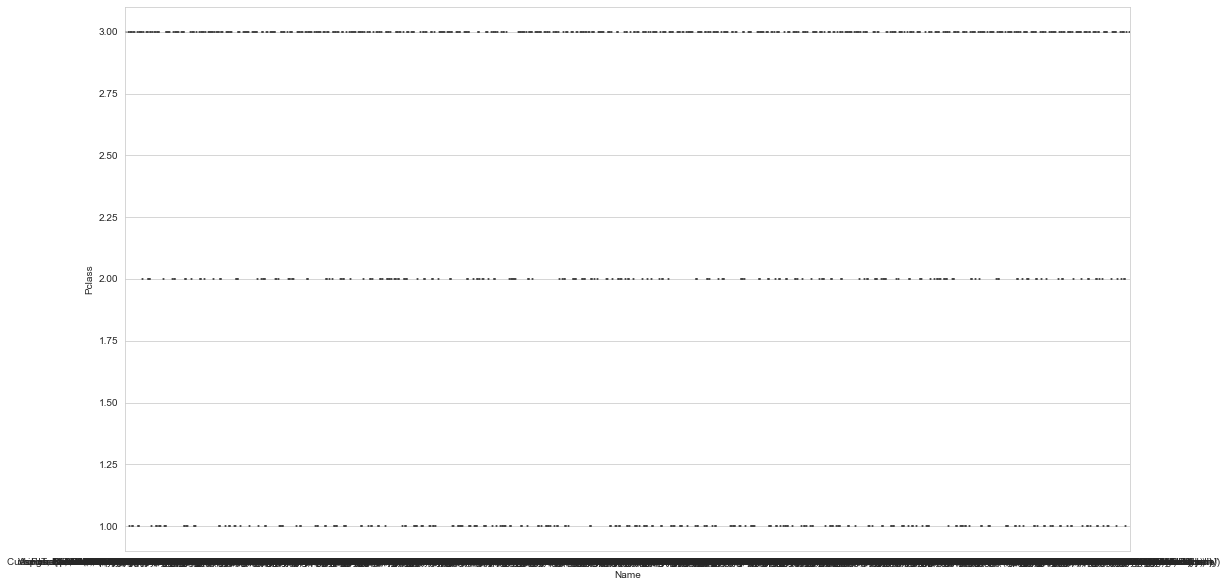

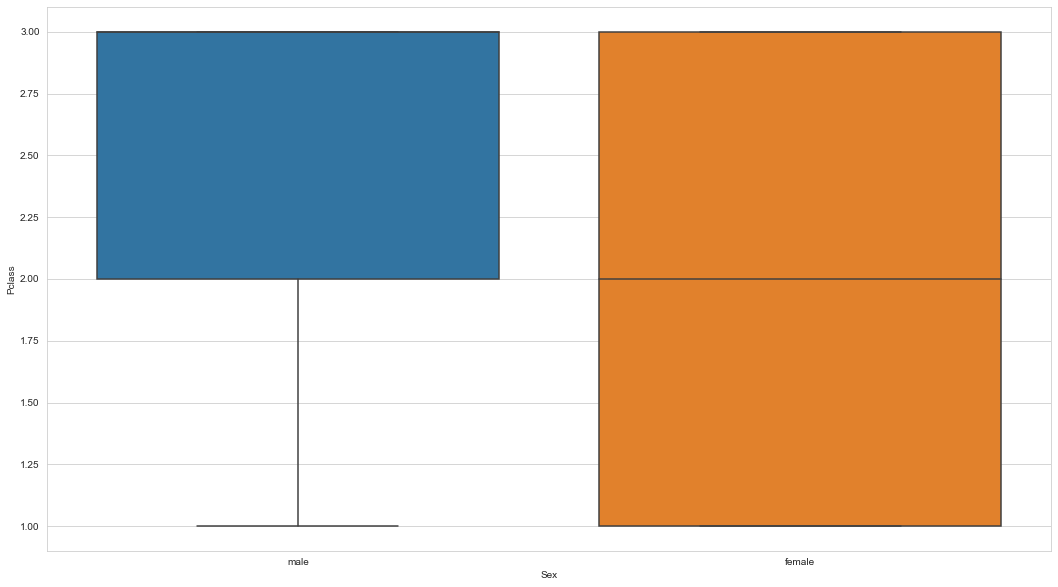

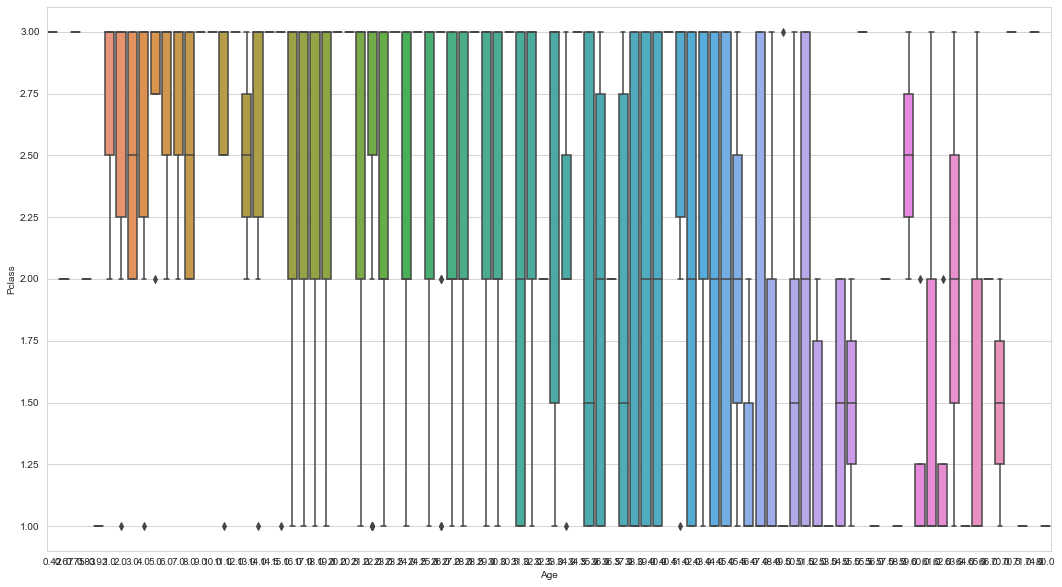

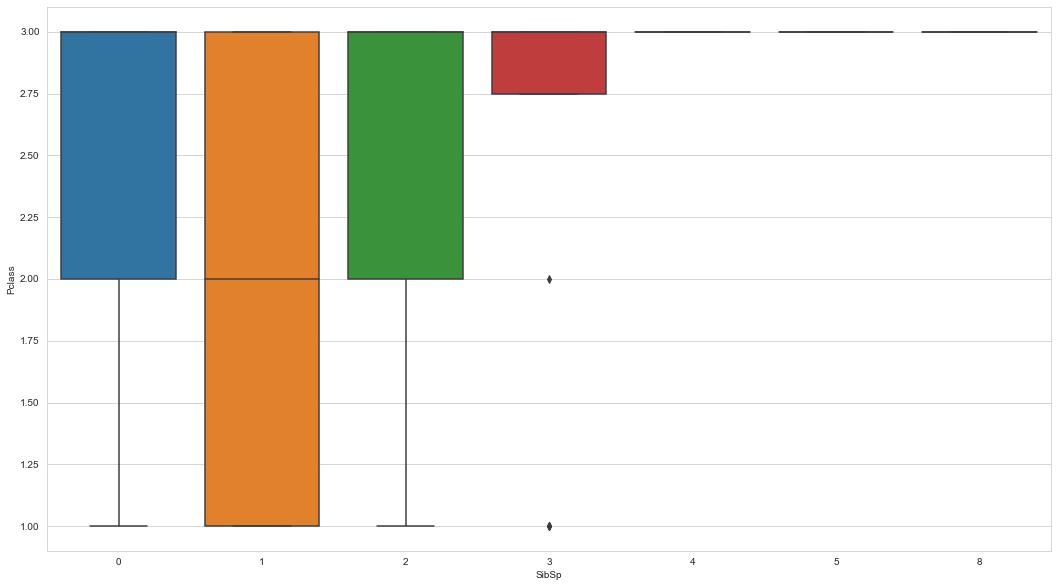

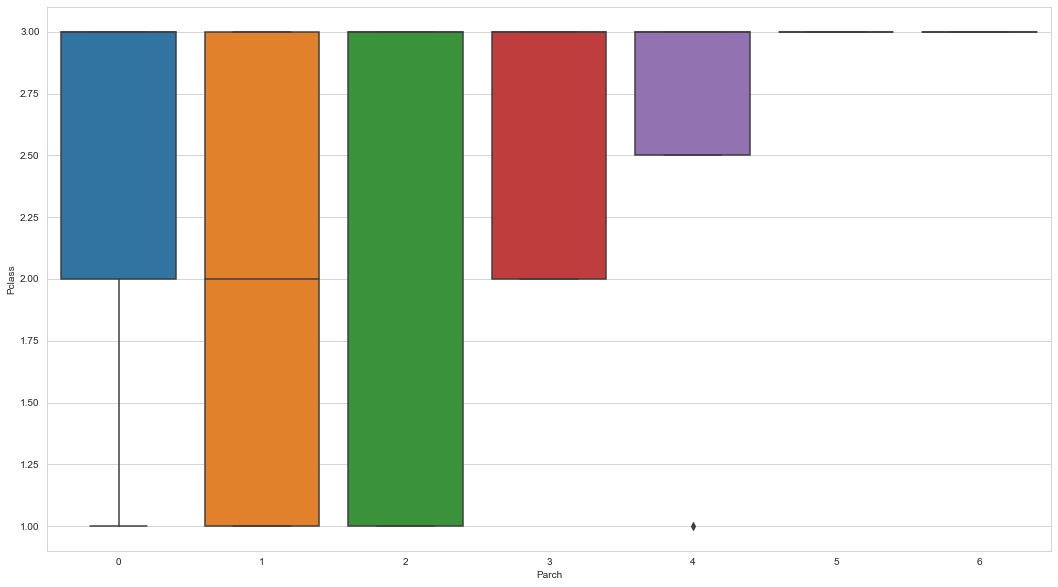

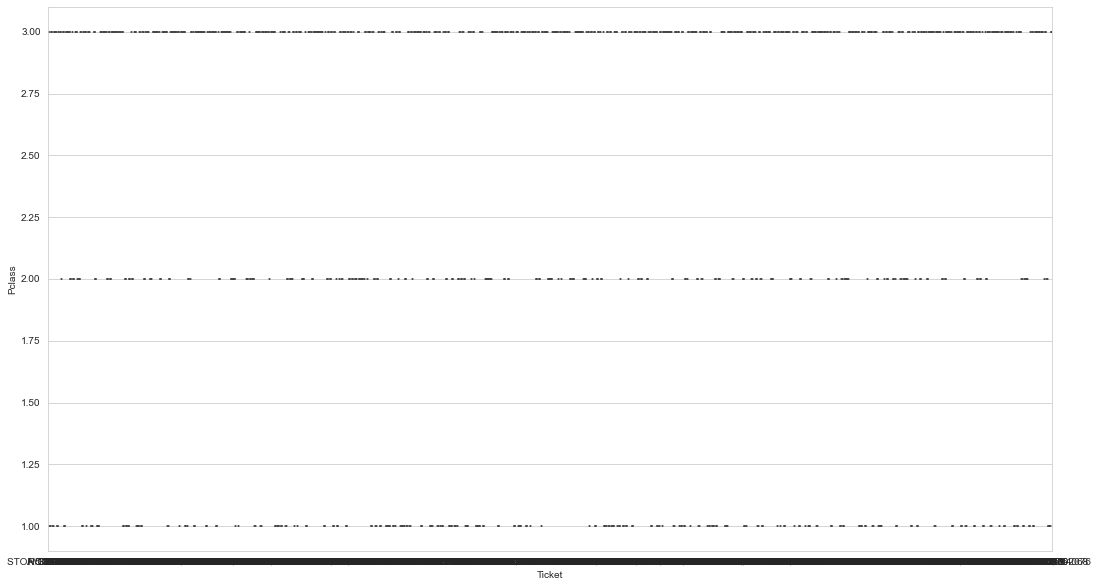

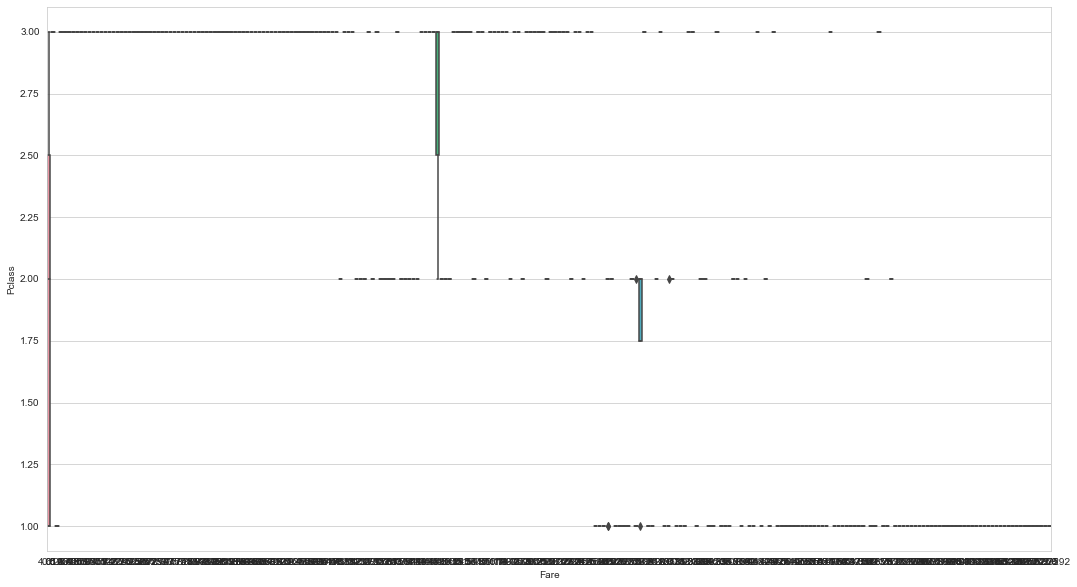

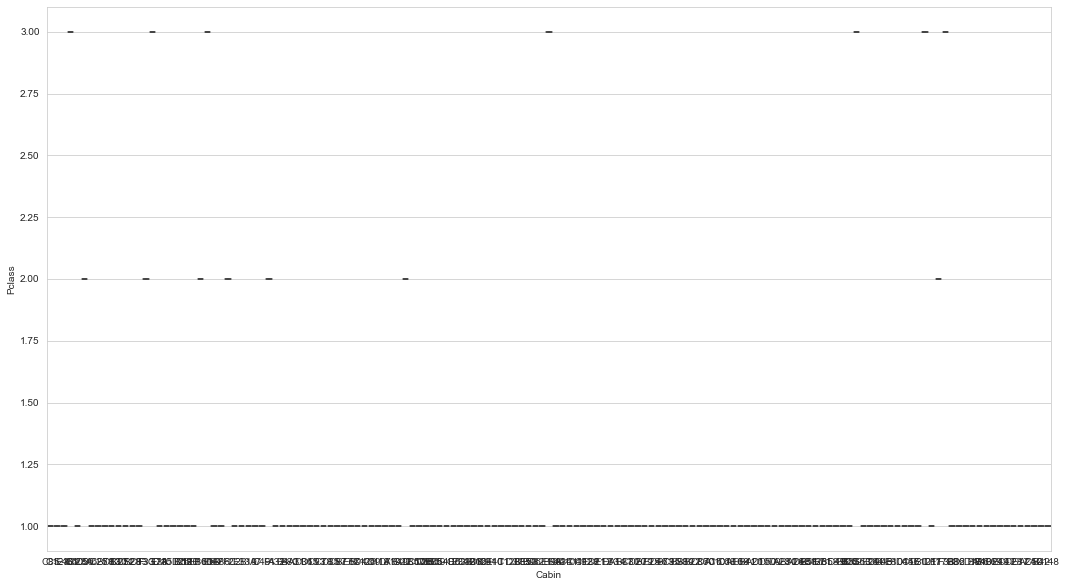

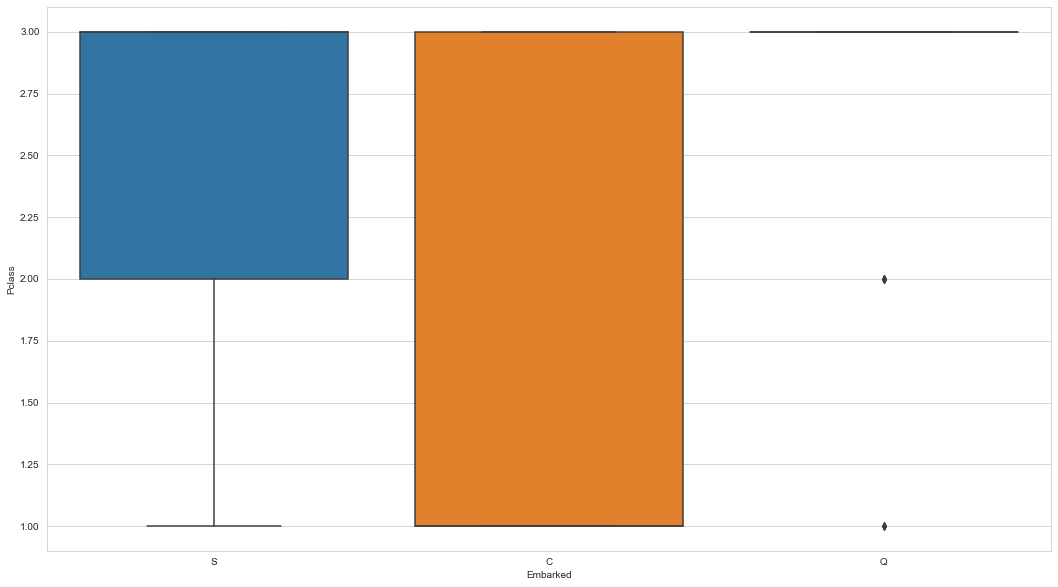

In [86]:
# Passanger class  Distribution
titanic_data = titanic.drop(['Pclass'], axis = 1)
for var in titanic_data:
    plt.rcParams.update({'figure.max_open_warning': 0})
    f, ax = plt.subplots(figsize = (18, 10))
    fig = sns.boxplot(x = titanic_data[var], y = titanic['Pclass'])

.

.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#BF40BF;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center;">
<span style="font-size:20px;"> Missing values
    </span>
    </p>
    </div>

Now we will be dealing with the missing value first to avoid any error or a biased model

In [212]:
from scipy import stats
from scipy.stats import skew, norm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [150]:
! pip install xgboost

In [151]:
import xgboost

In [152]:
from xgboost import XGBRegressor

In [228]:
print(titanic.shape)

(891, 12)


In [229]:
missing_val_count_by_column = (titanic.isnull().sum())

In [230]:
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Cabin    687
dtype: int64


**From the above we have abobe** 
* 177 missing data from Age
* 687 missing data from cabin and
* 2 missing data from Embarked

now this will lead to  avery wrong predictions and error if we try to build a model using thid data 
so we have to find it missing value now we could drop the column but Age And Embarked are to important to drop
anf if droped it will lead to a very biased model
so we will use another option called **Imputation**.

**Imputation** fills in the missing values with some number **NoteThe imputed value won't be exactly right in most cases, but it usually leads to more accurate models than you would get from dropping the column entirely.**

.

**let get our X and y**

In [231]:
y = titanic.Survived

Befor we get Our X let convert our object data ( Sex,and Embarked) numeric(intger) insted of writing another code for Categorical Variable

In [232]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [233]:
titanic['Embarked']= titanic['Embarked'].replace(['C','S','Q'],[1,2,3])

In [234]:
titanic['Sex']=titanic['Sex'].replace(['female','male'],[0,1])

In [160]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2.0


**Note the Changes** 

In [161]:
feature_names = ['Pclass','Sex','Age','SibSp','Parch','Embarked']

X = titanic[feature_names]

X.head().style.background_gradient(cmap='Purples_r')

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.000000,1,0,2.000000
1,1,0,38.000000,1,0,1.000000
2,3,0,26.000000,0,0,2.000000
3,1,0,35.000000,1,0,2.000000
4,3,1,35.000000,0,0,2.000000


In [162]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

<span style="color:Purple;">
<span style="font-size:18px;">
<b>The MAE (The Mean absolute Error)
    </b>
    </span>
    </span>
    

In [214]:
val_mae = mean_absolute_error(val_y, val_predictions)
print(mean_absolute_error(val_y, val_predictions))

0.2512322505596048


In [163]:
def titanic_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

<b>IMPUTATION</b>

In [164]:
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("MAE from Imputation:")
print(titanic_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE from Imputation:
0.2228912333490086


**Filling Missing Value**

In [165]:
titanic.Embarked.fillna(titanic.Embarked.dropna().max(), inplace=True)

In [166]:
#Age
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [167]:
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)

In [168]:
print(titanic.isnull().sum())
print(titanic.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
(891, 12)


In [169]:
X.head(30)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,2.0
1,1,0,38.0,1,0,1.0
2,3,0,26.0,0,0,2.0
3,1,0,35.0,1,0,2.0
4,3,1,35.0,0,0,2.0
5,3,1,24.0,0,0,3.0
6,1,1,54.0,0,0,2.0
7,3,1,2.0,3,1,2.0
8,3,0,27.0,0,2,2.0
9,2,0,14.0,1,0,1.0


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#BF40BF;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center;">
<span style="font-size:20px;"> Model And Model Prediction
    </span>
    </p>
    </div>

In [170]:
titanic_model = DecisionTreeRegressor(random_state=1)

titanic_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [171]:
predictions = titanic_model.predict(X)

print(predictions)

[0.         1.         1.         1.         0.         0.05
 0.         0.         1.         1.         1.         1.
 0.         0.         0.         1.         0.         0.125
 0.         1.         0.         0.33333333 1.         0.66666667
 0.         1.         0.06666667 0.         0.82352941 0.10204082
 0.5        1.         0.82352941 0.         0.         0.5
 0.06666667 0.08333333 0.         1.         0.         0.
 0.06666667 1.         1.         0.10204082 0.         0.82352941
 0.         0.         0.         0.08333333 1.         1.
 0.         0.26666667 1.         0.         1.         0.
 0.5        1.         0.         0.         0.16666667 1.
 1.         0.09090909 1.         0.         0.         0.
 0.         0.         0.55555556 0.16666667 0.10204082 0.10204082
 1.         0.5        0.         0.2        0.82352941 0.66666667
 1.         1.         0.         0.10204082 1.         0.10204082
 0.2        0.         0.         0.         0.         0.102

In [191]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_train)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

94.1

In [198]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_train)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

94.1

In [183]:
titanic_transformer = SimpleImputer(strategy='constant')



In [199]:
model = Pipeline(titanic_model)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#BF40BF;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center;">
<span style="font-size:20px;"> Model Validation
    </span>
    </p>
    </div>

In [172]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [173]:
titanic_model = DecisionTreeRegressor(random_state=1)

titanic_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [174]:
val_predictions = titanic_model.predict(val_X)
print((val_y, val_predictions))

(862    1
223    0
84     1
680    0
535    1
      ..
506    1
467    0
740    1
354    0
449    1
Name: Survived, Length: 223, dtype: int64, array([1.        , 0.05714286, 1.        , 0.84615385, 1.        ,
       0.09090909, 0.        , 1.        , 1.        , 1.        ,
       0.2       , 1.        , 0.        , 0.        , 0.84615385,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.71428571, 0.        , 1.        , 0.        , 1.        ,
       0.66666667, 1.        , 1.        , 0.        , 1.        ,
       0.66666667, 0.1       , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.05714286, 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.5       , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.1       , 0.        , 0.        

## Cross validation

In [202]:
my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

In [205]:
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 0.24191878696318048


In [209]:
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [0.29108357 0.21746023 0.24200446 0.23803627 0.22100939]


In [206]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators, random_state=0))
])
    
    scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')
    return scores.mean()


In [208]:
results = {}
for i in range(1,9):
    results[50*i] = get_score(50*i)

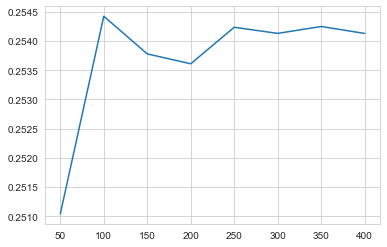

In [210]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

.

<p style="text-align:center;">
<span style="color:Purple;">
<span style="font-size:20px;">
<b>Random Forests
    </b>
    </span>
    </span>
    </p>

In [220]:
titanicR_model =RandomForestRegressor(random_state=1)
titanicR_model.fit(train_X, train_y)
titanic_preds =titanicR_model.predict(val_X)
rf_val_me = mean_absolute_error(titanic_preds,val_y)


In [222]:
print("Validation MAE for Random Forest Model: {}".format(rf_val_me))

Validation MAE for Random Forest Model: 0.2667188466961562


.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#BF40BF;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center;">
<span style="font-size:20px;"> XGBoost
    </span>
    </p>
    </div>

In [235]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [237]:
y = titanic.Survived
feature_names = ['Pclass','Sex','Age','SibSp','Parch','Embarked']

X = titanic[feature_names]

In [238]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [239]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [240]:
predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 0.2289092766286517


In [245]:
mae_1 = mean_absolute_error(predictions, y_valid)
print("Mean Absolute Error:" , mae_1)

Mean Absolute Error: 0.2289092766286517


In [254]:
my_model_1 = XGBRegressor(n_estimators=500)
my_model_1.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [251]:
my_model_2 = XGBRegressor(n_estimators=1)

my_model_2.fit(X_train,y_train)

predictions_2 = my_model_2.predict(X_valid)

mae_2 = mean_absolute_error(predictions_2,y_valid)

print("Mean Absolute Error:" , mae_2)


Mean Absolute Error: 0.41749491191765653


In [255]:
my_model_3 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model_3.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [256]:
my_model_4 = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model_4.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [260]:
my_model_3 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model_3.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)
predictions_3 = my_model_3.predict(X_valid)
mae_3 = mean_absolute_error(predictions_3,y_valid)


In [263]:
print("Mean Absolute Error:", mae_3)

Mean Absolute Error: 0.22388406896404087
